In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib.lines import Line2D

#import statsmodels.formula.api as smf
from scipy.stats import rankdata

#from sklearn.metrics import roc_curve, confusion_matrix, auc
#from sklearn import linear_model, neighbors, ensemble
#from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, quantile_transform


import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'font.size': 15})
del mpl
sns.set_style("white")
sns.set_style("ticks")

In [2]:

def ngraph(comp1,comp2, ax_labels=['First Component', 'Second Component'], 
           ncounts=True, binticks=False, ctitle=None):
    '''Creates a simple scatter plot of two
    boolean variables that includes n-counts of
    the 4 clusters of overlapping points'''
    
    #Round them for convenient labelling
    x=np.round(comp1,2)
    y=np.round(comp2,2)
    
    ##set histogram bins to be neatly around the 4 possible values
    xuniq = list(set(x))
    xuniq.sort()
    xedges = np.asarray([i+.5 for i in xuniq])
    xedges = np.insert(xedges,0,xuniq[0]-.5)
    yuniq = list(set(y))
    yuniq.sort()
    yedges = np.asarray([i+.5 for i in yuniq])
    yedges = np.insert(yedges,0,yuniq[0]-.5)
    bins=np.asarray([yedges,xedges])
    
    #Create 2D histogram for labels
    hist, xbins,ybins = np.histogram2d(y,x, bins=bins)
    #create meshgrid for label coordinates
    B,C = np.meshgrid(xuniq, yuniq)
    #Don't label zeroes in the histogram
    X = B[hist != 0]
    Y = C[hist != 0]
    Z   = hist[hist != 0]
    
    fig, ax = plt.subplots(figsize=[5,5])
    ax.scatter(x,y, s=100, alpha=0.4, marker='o', color='black')
    plt.axvline(0, color='k', linestyle='dashed', linewidth=1)
    plt.axhline(0, color='k', linestyle='dashed', linewidth=1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel(ax_labels[0])
    plt.ylabel(ax_labels[1])
    #print(inspect.getargvalues(ngraph))
    plt.title(ctitle)
    if binticks:
        plt.xticks([0,1])
        plt.yticks([0,1])
    if ncounts:
        for i in range(len(Z)):
            ax.annotate(str(int(Z[i]))+" points", xy=(X[i],Y[i]), xytext=(7,1), 
                        textcoords="offset points", fontsize=15, fontstyle='italic', color='grey')
    plt.show()
    

In [3]:
def explode(a,b, components=True):
    if components:
        color1, color2 = 'green', 'purple'
    else:
        color1, color2 = 'red', 'blue'
    fig = plt.figure(figsize=[15,5])
    gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 8]) 
    ax1 = fig.add_subplot(gs[0])
    ax1.scatter([0 for y in a],a, color=color1)
    if components:
        plt.xlabel('First Component')
    else:
        plt.xlabel('First Feature')
    plt.xticks([])

    ax2 = fig.add_subplot(gs[1], sharey=ax1)
    ax2.scatter([0 for y in b],b, color=color2)
    if components:
        plt.xlabel('Second Component')
    else:
        plt.xlabel('Second Feature')
    plt.setp(ax2.get_yticklabels(), visible=False)
    plt.xticks([])

    ax3 = fig.add_subplot(gs[2], sharey=ax1)
    ax2.axis = ax1.axis
    ax3.plot(a, color=color1, marker='o', linestyle='None', alpha=.5)
    ax3.plot(b, color=color2, marker='o', linestyle='None', alpha=.5)
    if components:
        plt.xlabel('Components "exploded" for visualization')
    else:
        plt.xlabel('Features "exploded" for visualization')
    plt.setp(ax3.get_yticklabels(), visible=False)
    plt.xticks([])
    plt.show()
    

In [4]:
def explodePres(a,b, components=True):
    if components:
        color1, color2 = 'green', 'purple'
    else:
        color1, color2 = 'red', 'blue'
    fig = plt.figure(figsize=[15,6])
    gs = gridspec.GridSpec(2, 3, width_ratios=[3, 1, 6], height_ratios=[5,1]) 
    ax1 = fig.add_subplot(gs[0])
    ax1.scatter([0 for y in a],a, color=color1)
    if components:
        plt.xlabel('First Component')
    else:
        plt.xlabel('First Feature')
    plt.xticks([])

    ax2 = fig.add_subplot(gs[1], sharey=ax1)
    ax2.scatter([0 for y in b],b, color=color2)
    if components:
        plt.xlabel('Second Component')
    else:
        plt.xlabel('Second Feature')
    #plt.setp(ax2.get_yticklabels(), visible=False)
    plt.xticks([])

    ax3 = fig.add_subplot(gs[2], sharey=ax1)
    ax2.axis = ax1.axis
    ax3.plot(a, color=color1, marker='o', linestyle='None', alpha=.5)
    ax3.plot(b, color=color2, marker='o', linestyle='None', alpha=.5)
    if components:
        plt.xlabel('Components "exploded" for visualization')
    else:
        plt.xlabel('Features "exploded" for visualization')
    plt.setp(ax3.get_yticklabels(), visible=False)
    plt.xticks([])
    
    ax4 = fig.add_subplot(gs[-1,0:2])
    ax4.scatter(a,[0 for _ in a], color=color1)
    if components:
        plt.xlabel('First Component')
    else:
        plt.xlabel('First Feature')
    plt.yticks([])
    plt.xticks(ax1.get_yticks())
    
    
    
    
    plt.show()

In [5]:
def explodehist(a,b, components=True):
    if components:
        color1, color2 = 'green', 'purple'
    else:
        color1, color2 = 'red', 'blue'
    fig = plt.figure(figsize=[15,5])
    gs = gridspec.GridSpec(1, 3, width_ratios=[1.5, 1.5, 7]) 
    ax1 = fig.add_subplot(gs[0])
    ax1.scatter([0 for y in a],a, color=color1)
    if components:
        plt.xlabel('First Component')
    else:
        plt.xlabel('First Feature')
    plt.xticks([])

    ax2 = fig.add_subplot(gs[1], sharey=ax1)
    ax2.scatter([0 for y in b],b, color=color2)
    if components:
        plt.xlabel('Second Component')
    else:
        plt.xlabel('Second Feature')
    plt.setp(ax2.get_yticklabels(), visible=False)
    plt.xticks([])
    
    ax3 = fig.add_subplot(gs[2])#, sharey=ax1)
    ax3.hist(np.round(b,3), bins=25, alpha=.5, orientation="horizontal", color=color2)
    ax3.hist(np.round(a,3), bins=25, alpha=.5, orientation="horizontal", color=color1)
    if components:
        plt.xlabel('Component Histogram')
    else:
        plt.xlabel('Features Histogram')
    plt.setp(ax3.get_yticklabels(), visible=False)
    plt.show()
    

**Using simple, fake data to understand how this works before digging into the real data:**
Let's start with just 2 binary variables. 

In [6]:
fake = pd.DataFrame({
    'la-resident': [1.,0.,1.,1.,0.,0.,0.,1.,1.,1.,1.,1.,0.,0.,0.],
    'fan-of-lakers': [1.,0.,1.,1.,0.,0.,1.,0.,0.,0.,0.,0.,1.,1.,1.]
})
fake.astype('int')

,la-resident,fan-of-lakers
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0
5,0,0
6,0,1
7,1,0
8,1,0
9,1,0


How would these look on a scatter plot? We'd expect just 4 clusters of points:

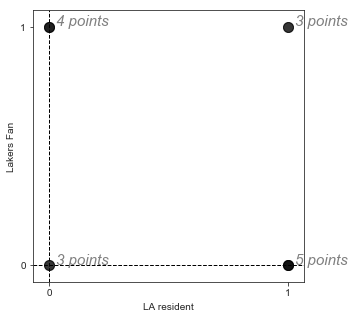

In [7]:
ngraph(fake['la-resident'] , fake['fan-of-lakers'],
       ax_labels=['LA resident', 'Lakers Fan'], binticks=True)

Suppose we ran PCA on just those two WITHOUT standard deviation scaling, and then plotted the two components - what would that look like?

We'd expect the first eigenvector to to "split up" the two clusters with the most points, which would be its way of explaining the most variance.

[0.31904762 0.21428571]


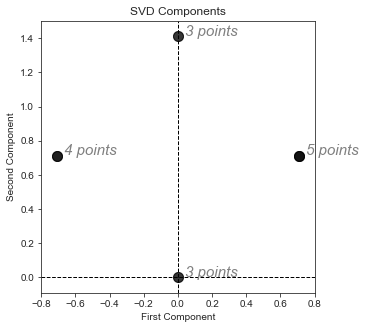

In [22]:
X = StandardScaler(with_mean=False, with_std=False).fit_transform(fake)
eig_val_cov, eig_vec_cov = np.linalg.eig(np.cov(X.T))
#Create the components in order of importance
ev_order = rankdata(eig_val_cov, method='ordinal')
eig_vec_cov = np.asarray([eig_vec_cov[i-1] for i in np.flip(ev_order)])
comp1 = eig_vec_cov[:,0].T.dot(X.T)
comp2 = eig_vec_cov[:,1].T.dot(X.T)
print(eig_val_cov)
ngraph(comp1, comp2, ctitle='SVD Components')

In [9]:
# #However, with scaling it's not so neat:
# X = StandardScaler(with_mean=True, with_std=False).fit_transform(fake)
# eig_val_cov, eig_vec_cov = np.linalg.eig(np.cov(X.T))
# #Create the components in order of importance
# ev_order = rankdata(eig_val_cov, method='ordinal')
# eig_vec_cov = np.asarray([eig_vec_cov[i-1] for i in np.flip(ev_order)])
# comp1 = eig_vec_cov[:,0].T.dot(X.T)
# comp2 = eig_vec_cov[:,1].T.dot(X.T)

# ngraph(comp1, comp2)


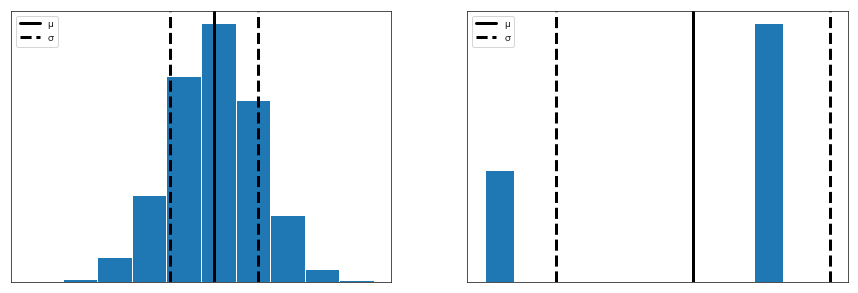

In [21]:
nm = np.random.normal(size=10000)
bn = np.random.binomial(n=1, p=.7,size=10000)
custom_lines = [Line2D([0], [0], color='k', lw=3),
                Line2D([0], [0], color='k', lw=3, linestyle='--')]
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.hist(nm)
plt.axvline(np.mean(nm), color='k', linestyle='solid', linewidth=3)
plt.axvline(np.mean(nm) - np.std(nm), color='k', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(nm) + np.std(nm), color='k', linestyle='dashed', linewidth=3)
plt.xticks([])
plt.yticks([])
plt.legend(custom_lines, ['μ', 'σ'], loc='upper left')
plt.subplot(122)
plt.hist(bn)
plt.axvline(np.mean(bn), color='k', linestyle='solid', linewidth=3)
plt.axvline(np.mean(bn) - np.std(bn), color='k', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(bn) + np.std(bn), color='k', linestyle='dashed', linewidth=3)
plt.xticks([])
plt.yticks([])
plt.legend(custom_lines, ['μ', 'σ'], loc='upper left')
plt.show()

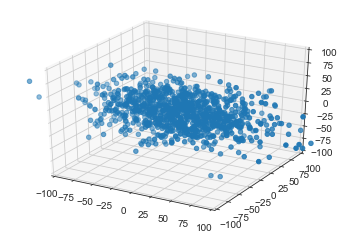

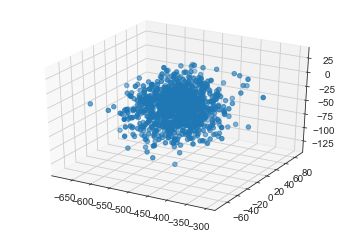

In [40]:
#Create charts that show why mean zero is important with continuous data
from mpl_toolkits.mplot3d import Axes3D 

var1 = np.random.normal(loc=0, scale=50, size=1000)
var2 = np.random.normal(loc=0, scale=25, size=1000)
var3 = np.random.normal(loc=0, scale=25, size=1000)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(var1, var2, var3, marker='o')
plt.xlim([-100,100])
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.set_zlim(-100, 100)
plt.show()

var1 = np.random.normal(loc=-500, scale=50, size=1000)
var2 = np.random.normal(loc=10, scale=25, size=1000)
var3 = np.random.normal(loc=-47, scale=25, size=1000)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(var1, var2, var3, marker='o')
#ax.set_xlim(-100, 100)
#ax.set_ylim(-100, 100)
#ax.set_zlim(-100, 100)
plt.show()



[1.28188776 0.86096939]


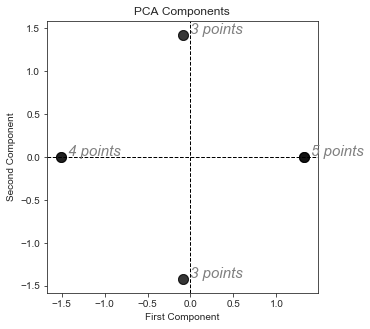

In [23]:
X = StandardScaler(with_mean=True, with_std=True).fit_transform(fake)
eig_val_cov, eig_vec_cov = np.linalg.eig(np.cov(X.T))
#Create the components in order of importance
ev_order = rankdata(eig_val_cov, method='ordinal')
eig_vec_cov = np.asarray([eig_vec_cov[i-1] for i in np.flip(ev_order)])
comp1 = eig_vec_cov[:,0].T.dot(X.T)
comp2 = eig_vec_cov[:,1].T.dot(X.T)
print(eig_val_cov)
ngraph(comp1, comp2, ctitle='PCA Components')

In [82]:
#Suppose we dropped 2 of our nonresident laker fans. what then? should be no change, right? The 
#previous eigenvector should still separate the 7 main points, and the second component can 
#separate the remaining 6. but what happens instead:
fake2 = pd.DataFrame({
    'la-resident': [1.,0.,1.,1.,0.,0.,0.,1.,1.,1.,1.,1.,0.],
    'fan-of-lakers': [1.,0.,1.,1.,0.,0.,1.,0.,0.,0.,0.,0.,1.]
})
X = StandardScaler(with_mean=True, with_std=True).fit_transform(fake2)
eig_val_cov, eig_vec_cov = np.linalg.eig(np.cov(X.T))
#Create the components in order of importance
#Do without the flip
#ev_order = rankdata(eig_val_cov, method='ordinal')
#eig_vec_cov = np.asarray([eig_vec_cov[i-1] for i in np.flip(ev_order)])
comp1 = eig_vec_cov[:,0].T.dot(X.T)
comp2 = eig_vec_cov[:,1].T.dot(X.T)

print('Vectors:', eig_vec_cov, '\n')
print('Values:',eig_val_cov)


Vectors: [[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]] 

Values: [1.05625    1.11041667]


# FF: SVD
Vectors: [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]] 

Values: [0.26282051 0.25      ]

# FT:
Vectors: [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]] 

Values: [1.11041667 1.05625   ]

# TF:
Vectors: [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]] 

Values: [0.26282051 0.25      ]

# TT: PCA
Vectors: [[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]] 

Values: [1.05625    1.11041667]


In [83]:
print(.26282051/0.25)
print(1.11041667/1.05625)

1.05128204
1.0512820544378698


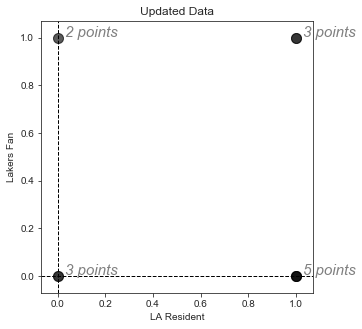

[1.05625    1.11041667]


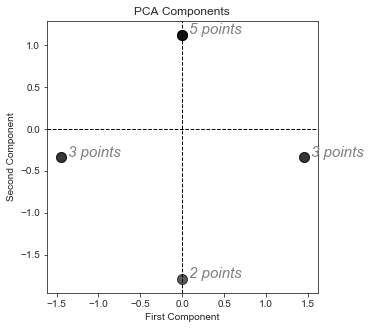

In [84]:
ngraph(fake2['la-resident'], fake2['fan-of-lakers'], 
       ax_labels=['LA Resident', 'Lakers Fan'], ctitle='Updated Data')
print(eig_val_cov)
ngraph(comp1, comp2, ctitle='PCA Components')

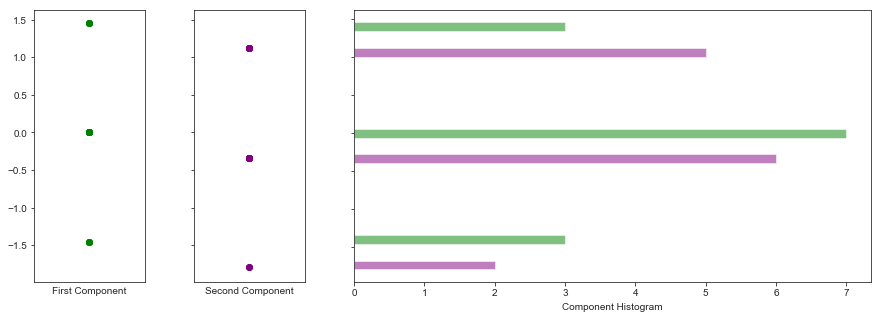

In [85]:
explodehist(comp1, comp2)

In [86]:
df = pd.read_csv('stdataset.csv')
df.columns = ["ID", 'gender', 'age', 'disability', 'mothersEdu', 'allSocialSkills', 'express', 'comply', 
              'disrupt', 'meetStReqs', 'meetPhysReqs', 'screenTime', 'tvTime', 'cpuTime', 'outdoorTime']
df.disability = np.where(df.disability == 'Yes', 1, 0)
df = pd.get_dummies(df, columns=['gender', 'mothersEdu'])

In [87]:
pcacols = df[['disability', 'meetStReqs', 'meetPhysReqs', 'gender_Male', 'mothersEdu_3']].astype('float')

#create a couple more:

pcacols['bothSTabovemean'] = (df.tvTime < np.mean(df.tvTime)) & (df.cpuTime > np.mean(df.cpuTime))
expressM = np.mean(df.express)
pcacols['expressive'] = df.express > expressM
complyM = np.mean(df.comply)
pcacols['compliant'] = df.comply > complyM


X = StandardScaler(with_mean=True, with_std=True).fit_transform(pcacols)
eig_val_cov, eig_vec_cov = np.linalg.eig(np.cov(X.T))
for i in range(len(pcacols.columns)):
    df['binComp'+str(i+1)] = eig_vec_cov[:,i].T.dot(X.T)

#for the sake of graphing:
pcacols['comp1']= eig_vec_cov[:,0].T.dot(X.T)
pcacols['comp2'] = eig_vec_cov[:,1].T.dot(X.T)

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype bool, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype bool, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


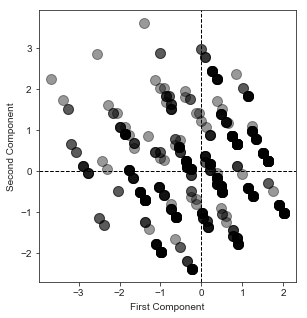

In [88]:
ngraph(pcacols.comp1, pcacols.comp2, ncounts=False)

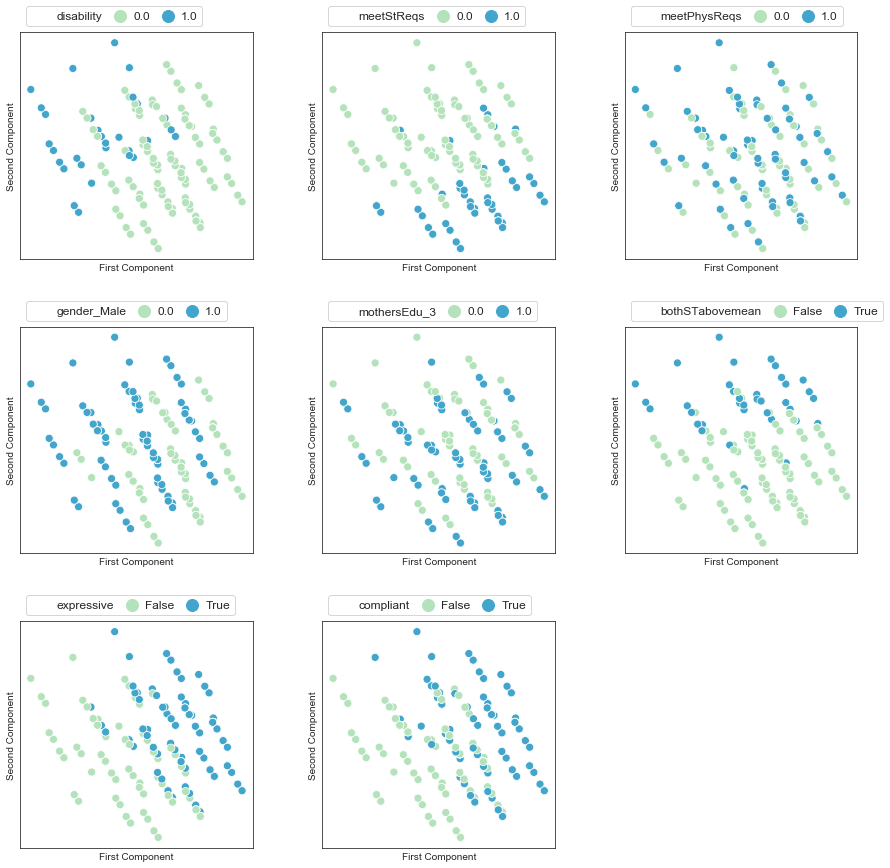

In [89]:
fig= plt.figure(figsize=[15,15])
sns.set_style("white")
sns.set_style("ticks")
for i,col in enumerate(pcacols.columns[:8]):
    fig.add_subplot(3,3,i+1)
    g =sns.scatterplot(x='comp1', y='comp2', hue=col, data=pcacols,
            s=65, marker='o', legend='brief', palette='GnBu')
    g.legend(loc='lower left',bbox_to_anchor=(0, 1), ncol=3, markerscale=2, columnspacing=.5, handletextpad=.1, fontsize=12)
    plt.xlabel('First Component')
    plt.ylabel('Second Component')
    #plt.yticks([np.min(pcacols.comp2),0,np.max(pcacols.comp2)])
    #plt.xticks([np.min(pcacols.comp1),0,np.max(pcacols.comp1)])
    plt.xticks([])
    plt.yticks([])
plt.subplots_adjust(wspace=.3, hspace=.3)
plt.show()

# What about One-hot encoded categorical variables?
There's some key differences here, notably that samples with multiple 1 values are much less common and depending on your permutations, rows with many zeroes will be much more common

Simple example first: 3 possible values, i.e. 2 columns after one-hot encoding

In [90]:
phones = pd.DataFrame({
    #'UID': [_ for _ in range(9)],
    'phoneOS': ['Other','Other', 'Android','Android','Android','Android',
                'iOS','iOS','iOS','iOS', 'Android']
})
phones

,phoneOS
0,Other
1,Other
2,Android
3,Android
4,Android
5,Android
6,iOS
7,iOS
8,iOS
9,iOS


In [91]:
phones = pd.get_dummies(phones)
#We can drop Other, which is redundant
phones = phones.drop('phoneOS_Other', axis=1)
phones

,phoneOS_Android,phoneOS_iOS
0,0,0
1,0,0
2,1,0
3,1,0
4,1,0
5,1,0
6,0,1
7,0,1
8,0,1
9,0,1


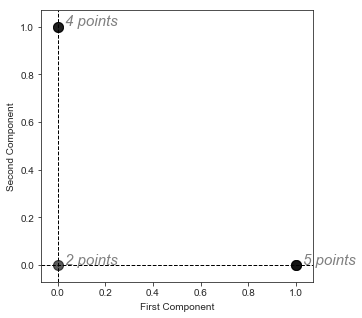

In [92]:
ngraph(phones.phoneOS_Android,phones.phoneOS_iOS)

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


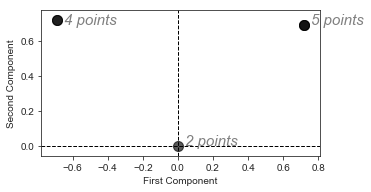

In [93]:
X = StandardScaler(with_mean=False, with_std=False).fit_transform(phones)
eig_val_cov, eig_vec_cov = np.linalg.eig(np.cov(X.T))
#Create the components in order of importance
ev_order = rankdata(eig_val_cov, method='ordinal')
eig_vec_cov = np.asarray([eig_vec_cov[i-1] for i in np.flip(ev_order)])
comp1 = eig_vec_cov[:,0].T.dot(X.T)
comp2 = eig_vec_cov[:,1].T.dot(X.T)

ngraph(comp1, comp2)

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


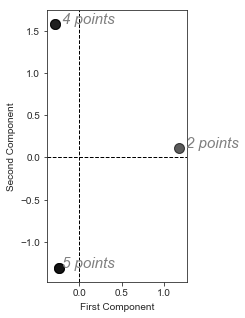

In [94]:
#Now with scaling
X = StandardScaler(with_mean=True, with_std=True).fit_transform(phones)
eig_val_cov, eig_vec_cov = np.linalg.eig(np.cov(X.T))
#Create the components in order of importance
ev_order = rankdata(eig_val_cov, method='ordinal')
eig_vec_cov = np.asarray([eig_vec_cov[i-1] for i in np.flip(ev_order)])
comp1 = eig_vec_cov[:,0].T.dot(X.T)
comp2 = eig_vec_cov[:,1].T.dot(X.T)

ngraph(comp1, comp2)

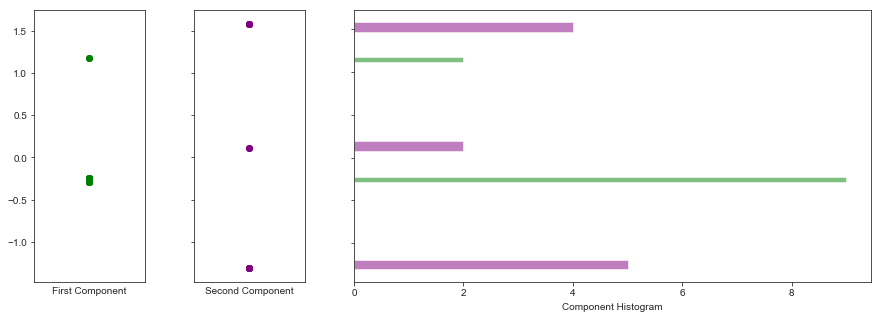

In [95]:
#I can't quite explain why this is happening. 
#The first component is clearly not explaining the variance as well as the second one is:
explodehist(comp1, comp2)

In [96]:
# teams = [
#     ['Warriors' for _ in range(120)],
#     ['Rockets' for _ in range(105)],
#     ['Thunder' for _ in range(98)],
#     ['Spurs' for _ in range(79)],
#     ['Raptors' for _ in range(77)],
#     ['Celtics' for _ in range(63)],
#     ['Sixers' for _ in range(54)],
#     ['Bucks' for _ in range(23)],
#     ['Nuggets' for _ in range(22)],
#     ['Lakers' for _ in range(5)]
# ]
# teams = [item for sublist in teams for item in sublist]
# len(teams)

# CATEGORICAL Example for Article

In [97]:
teams = [
    ['Warriors' for _ in range(55)],
    ['Rockets' for _ in range(42)],
    ['Lakers' for _ in range(3)]
]
teams = [item for sublist in teams for item in sublist]
len(teams)

100

In [98]:
residences = [
    #Generate Warriors correlation
    ['SanFran' for _ in range(25)],
    ['SanDiego' for _ in range(10)],
    ['LosAngeles' for _ in range(10)],
    #Rockets and lakers Correlation
    ['SanFran' for _ in range(20)],
    ['SanDiego' for _ in range(15)],
    ['LosAngeles' for _ in range(20)],
    
    
]
residences = [item for sublist in residences for item in sublist]
len(residences)

100

In [99]:

nba = pd.DataFrame({
    'best':teams,
    'residence':residences
})
#for the article:
nba['count'] = 1
display(nba.groupby(['residence', 'best']).agg('count'))
nba = pd.get_dummies(nba)
nba = nba.drop('count',axis=1)
print(nba.shape)
nba.sample(5)

count
residence  best           
LosAngeles Lakers        3
           Rockets      17
           Warriors     10
SanDiego   Rockets      15
           Warriors     10
SanFran    Rockets      10
           Warriors     35

(100, 6)


,best_Lakers,best_Rockets,best_Warriors,residence_LosAngeles,residence_SanDiego,residence_SanFran
77,0,1,0,0,1,0
20,0,0,1,0,0,1
94,0,1,0,1,0,0
4,0,0,1,0,0,1
11,0,0,1,0,0,1


c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


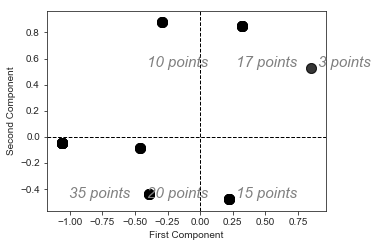

In [100]:
X = StandardScaler(with_mean=False, with_std=False).fit_transform(nba)
eig_val_cov, eig_vec_cov = np.linalg.eig(np.cov(X.T))
#Create the components in order of importance
ev_order = rankdata(eig_val_cov, method='ordinal')
eig_vec_cov = np.asarray([eig_vec_cov[i-1] for i in np.flip(ev_order)])
comp1 = eig_vec_cov[:,0].T.dot(X.T)
comp2 = eig_vec_cov[:,1].T.dot(X.T)

ngraph(comp1, comp2)

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


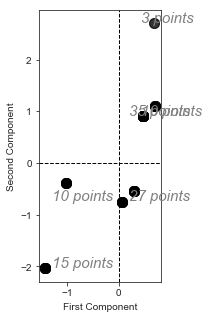

In [104]:
#Now with scaling
X = StandardScaler(with_mean=True, with_std=True).fit_transform(nba)
eig_val_cov, eig_vec_cov = np.linalg.eig(np.cov(X.T))
#Create the components in order of importance
ev_order = rankdata(eig_val_cov, method='ordinal')
eig_vec_cov = np.asarray([eig_vec_cov[i-1] for i in np.flip(ev_order)])
comp1 = eig_vec_cov[:,0].T.dot(X.T)
comp2 = eig_vec_cov[:,1].T.dot(X.T)

ngraph(comp1, comp2)

In [106]:
scaledData = pd.DataFrame(X, columns=nba.columns)

In [107]:
for columnName in scaledData.columns:
    print(columnName)
    print(scaledData[columnName].unique(), '\n')

best_Lakers
[-0.17586311  5.6862407 ] 

best_Rockets
[-0.85096294  1.1751393 ] 

best_Warriors
[ 0.90453403 -1.1055416 ] 

residence_LosAngeles
[-0.65465367  1.52752523] 

residence_SanDiego
[-0.57735027  1.73205081] 

residence_SanFran
[ 1.1055416  -0.90453403] 



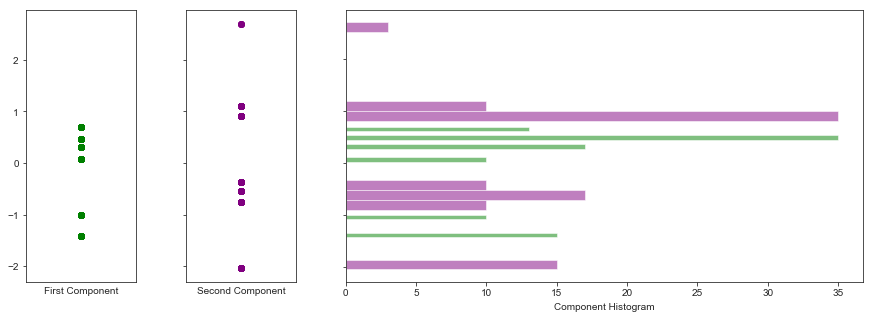

In [108]:
explodehist(comp1, comp2)

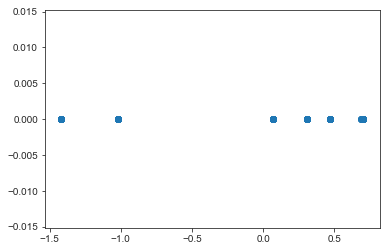

In [109]:
plt.scatter(comp1,[0 for _ in comp1])
plt.show()

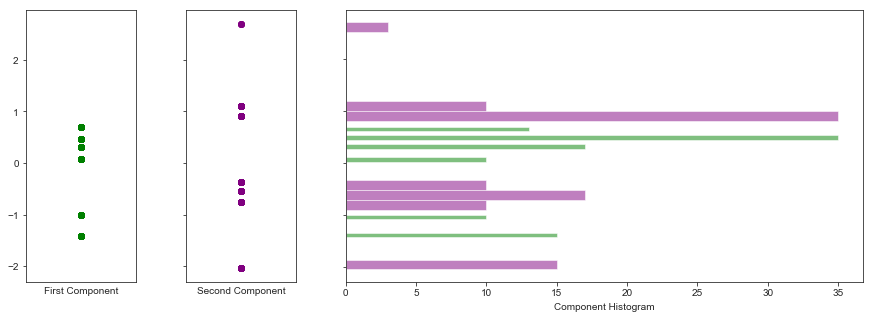

In [110]:
explodehist(comp1, comp2)

Note: Scaling to STD==1, which PCA requires, places a heavy emphasis on rare category values! Note how warriors and Rockets are really not that far from each other, whereas Lakers is pretty far. PCA prioritizes explaining that variance, and that's why our first 2 components don't differentiate the most important information. 